# Linear Regression

1. import libraries
2. load the data set
3. EDA - Correlation matrix, feature importance
4. Encode categorical data - label encoder (1,2,3) - OHE (001, 010, 100) + remove last column
5. split the data
6. scale / transform the data
7. modelling
8. predict on test data, print corf, intercept
9. evaluate - r^2

- removing outlier helped
- tries ElasticNet, Ridge Regression


Best Result || R squared: 0.75

- outlier removal
- standard scaler
- polynomial regression, degree 3

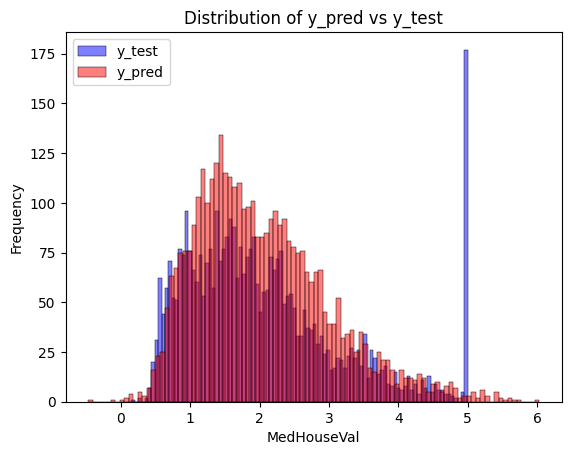

In [191]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import ElasticNet

In [227]:
data = fetch_california_housing(as_frame=True)
data = data.frame
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [3]:
corr = data.corr()

<Axes: >

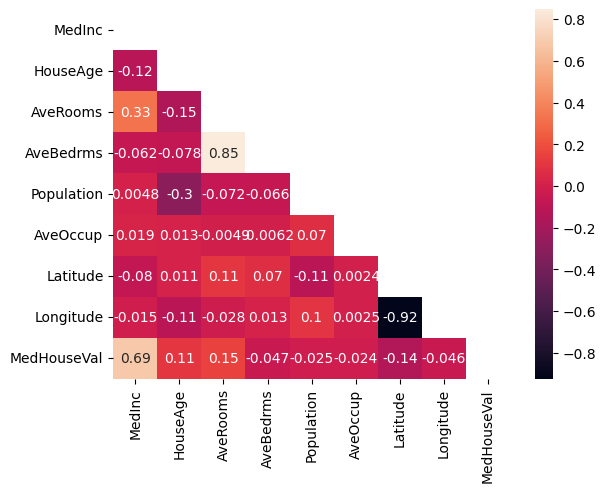

In [4]:
sns.heatmap((corr), annot=True, mask=np.triu(corr))

In [5]:
data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [6]:
data.isnull().sum(axis=0)
# data.dropna(inplace=True)

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [21]:
X = data.iloc[:, 0:8]
y = data.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,
                                                    random_state=42)

In [24]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.fit_transform(X_test)

In [27]:
pd.DataFrame(scaled_X_train).describe()

,0,1,2,3,4,5,6,7
count,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04
mean,-6.519333e-17,-9.251859e-18,-1.981081e-16,-1.707291e-16,-2.151595e-19,4.936566e-17,6.400995e-17,1.753335e-15
std,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00
min,-1.775438e+00,-2.190766e+00,-1.904386e+00,-1.762117e+00,-1.251913e+00,-2.076846e-01,-1.447697e+00,-2.377207e+00
25%,-6.900689e-01,-8.417859e-01,-4.118373e-01,-2.081645e-01,-5.606339e-01,-5.770769e-02,-8.018107e-01,-1.110749e+00
50%,-1.758995e-01,3.108328e-02,-8.350905e-02,-1.094160e-01,-2.281865e-01,-2.415892e-02,-6.473597e-01,5.346501e-01
75%,4.686502e-01,6.658972e-01,2.621376e-01,8.455177e-03,2.634487e-01,1.580865e-02,9.720351e-01,7.839530e-01
max,5.839268e+00,1.856173e+00,5.716655e+01,5.664727e+01,3.012743e+01,1.071164e+02,2.951816e+00,2.628794e+00


In [48]:
reg = LinearRegression().fit(scaled_X_train, y_train)
# reg.score(scaled_X_train, y_train)
# print(reg.coef_, reg.intercept_)
pred = reg.predict(scaled_X_test)
r2_score(y_test, pred)

0.5887810596909611

In [39]:
reg = LinearRegression().fit(X_train, y_train)
pred = reg.predict(X_test)
r2_score(y_test, pred)

0.5757877060324508

In [44]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=True)
x_train_trans = poly.fit_transform(scaled_X_train)
x_test_trans = poly.transform(scaled_X_test)

lr = LinearRegression()
lr.fit(x_train_trans, y_train)
y_pred = lr.predict(x_test_trans)
r2_score(y_test, y_pred)

-0.2352905863482735

In [60]:
# take one of lat or lon

X_train_wo_lat = X_train.iloc[:, [0,1,2,3,4,5,7]]
X_test_wo_lat = X_test.iloc[:, [0,1,2,3,4,5,7]]
# X_train_wo_lat

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train_wo_lat)
scaled_X_test = scaler.fit_transform(X_test_wo_lat)

reg = LinearRegression().fit(scaled_X_train, y_train)
# reg.score(scaled_X_train, y_train)
# print(reg.coef_, reg.intercept_)
pred = reg.predict(scaled_X_test)
r2_score(y_test, pred)

0.5233204842818497

In [63]:
# take one of ave rooms or ave bedrooms

X_train_wo_averoom = X_train.iloc[:, [0,1,3,4,5,6,7]]
X_test_wo_averoom = X_test.iloc[:, [0,1,3,4,5,6,7]]
# X_train_wo_averoom

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train_wo_averoom)
scaled_X_test = scaler.fit_transform(X_test_wo_averoom)

reg = LinearRegression().fit(scaled_X_train, y_train)
# reg.score(scaled_X_train, y_train)
# print(reg.coef_, reg.intercept_)
pred = reg.predict(scaled_X_test)
r2_score(y_test, pred)

0.586701935285167

In [71]:
regr = ElasticNet(random_state=0)

reg = regr.fit(X_train, y_train)
pred = reg.predict(X_test)
r2_score(y_test, pred)

0.41655189098028245

In [74]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=1.0)
reg = ridge_model.fit(scaled_X_train, y_train)
pred = reg.predict(scaled_X_test)
r2_score(y_test, pred)

0.5867079929415199

<Axes: xlabel='AveOccup', ylabel='MedHouseVal'>

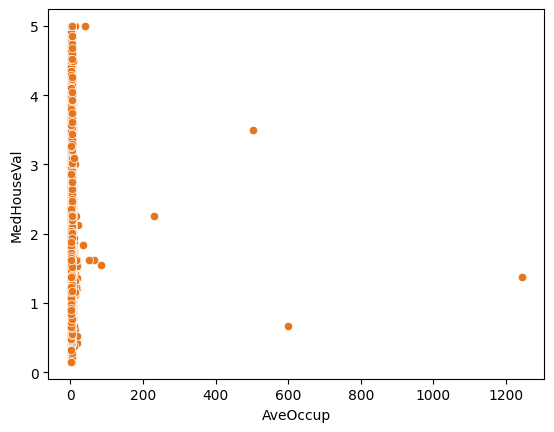

In [112]:
# remove outliers from 'AveRooms', 'AveBedrms', 'Population', 'AveOccup'

sns.scatterplot(y='MedHouseVal',x="AveOccup",data=data,color='#E8751A')

In [276]:
# data_copy = data[data["AveRooms"]<=80]
# data_copy = data_copy[data_copy["AveBedrms"]<=20]
# data_copy = data_copy[data_copy["Population"]<=20000]
# data_copy = data_copy[data_copy["AveOccup"]<=200]
# 0.62 - R2

# data_copy = data[data["AveRooms"]<=50]
# data_copy = data_copy[data_copy["AveBedrms"]<=10]
# data_copy = data_copy[data_copy["Population"]<=12000]
# data_copy = data_copy[data_copy["AveOccup"]<=20]
# 0.65 - R2

# data_copy = data[data["AveRooms"]<=25]
# data_copy = data_copy[data_copy["AveBedrms"]<=6]
# data_copy = data_copy[data_copy["Population"]<=8000]
# data_copy = data_copy[data_copy["AveOccup"]<=7]
# 0.66 - R2

# data_copy = data[data["AveRooms"]<=12]
# data_copy = data_copy[data_copy["AveBedrms"]<=4]
# data_copy = data_copy[data_copy["Population"]<=7000]
# data_copy = data_copy[data_copy["AveOccup"]<=6]
# 0.67 - R2

data_copy = data[data["AveRooms"]<=8]
data_copy = data_copy[data_copy["AveBedrms"]<=1.75]
data_copy = data_copy[data_copy["Population"]<=5000]
data_copy = data_copy[data_copy["AveOccup"]<=5]
# 0.68 - R2

<Axes: xlabel='AveBedrms', ylabel='MedHouseVal'>

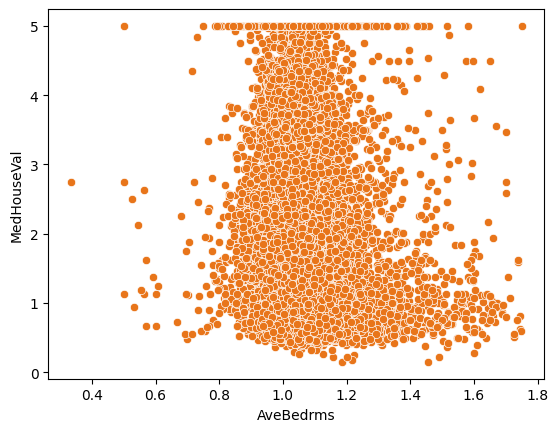

In [277]:
sns.scatterplot(y='MedHouseVal',x="AveBedrms",data=data_copy,color='#E8751A')

In [278]:
X = data_copy.iloc[:, 0:8]
y = data_copy.iloc[:, -1]
X_train_o, X_test_o, y_train_o, y_test_o = train_test_split(X, y, test_size=0.20,
                                                    random_state=42)

In [279]:
scaler = StandardScaler()
scaled_X_train_o = scaler.fit_transform(X_train_o)
scaled_X_test_o = scaler.fit_transform(X_test_o)

In [280]:
reg = LinearRegression().fit(scaled_X_train_o, y_train_o)
pred = reg.predict(scaled_X_test_o)
r2_score(y_test_o, pred)

0.6808498439868114

In [292]:
lg=LinearRegression()
poly=PolynomialFeatures(degree=3)

x_train_fit = poly.fit_transform(scaled_X_train_o)
lg.fit(x_train_fit, y_train_o)
x_test_ = poly.fit_transform(scaled_X_test_o)
y_predicted = lg.predict(x_test_)

mae = mean_absolute_error(y_test_o , y_predicted)
print('MAE: ',mae)
print("MSE: ", metrics.mean_squared_error(y_test_o, y_predicted))
print("R squared: ", metrics.r2_score(y_test_o,y_predicted))

# best result

MAE:  0.40295907683945836
MSE:  0.32079220150000176
R squared:  0.7509738381910227


In [293]:
# from sklearn.preprocessing import RobustScaler
# Scaler = RobustScaler()
# scaled_X_train_o = Scaler.fit_transform(X_train_o)
# scaled_X_test_o = Scaler.fit_transform(X_test_o)
# reg = LinearRegression().fit(scaled_X_train_o, y_train_o)
# pred = reg.predict(scaled_X_test_o)
# r2_score(y_test_o, pred)

In [294]:
# from sklearn.metrics import mean_squared_error
# from sklearn.metrics import mean_absolute_error
# from sklearn import metrics
# mse = mean_squared_error(y_test_o, pred)
# r = metrics.r2_score(y_test_o, pred)
# mae = mean_absolute_error(y_test_o, pred)
# print("MSE: ", mse)
# print("R squared: ", r)
# print("MAE: ", mae)

In [295]:
test_pred = pd.DataFrame({"y_test":y_test_o, "y_pred": y_predicted})
test_pred

,y_test,y_pred
12448,0.949,-0.105950
5723,4.466,4.129585
14782,1.389,1.951403
3549,2.776,3.000722
14223,2.666,2.732257
...,...,...
13309,1.355,1.363524
14749,1.276,1.899749
310,0.947,1.579041
12787,0.710,0.664824


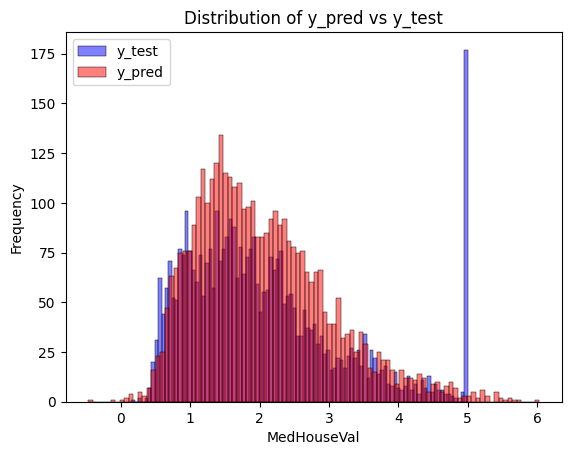

In [297]:
import matplotlib.pyplot as plt
sns.histplot(data=test_pred, x='y_test', bins=100, color='blue', alpha=0.5, label='y_test')
sns.histplot(data=test_pred, x='y_pred', bins=100, color='red', alpha=0.5, label='y_pred')
plt.xlabel('MedHouseVal')
plt.ylabel('Frequency')
plt.title('Distribution of y_pred vs y_test')
_ = plt.legend()

In [267]:
# clip data

data_copy = data.copy()
data_copy['AveRooms'] = data_copy['AveRooms'].clip(upper=12)
data_copy['AveBedrms'] = data_copy['AveBedrms'].clip(upper=5)
data_copy['Population'] = data_copy['Population'].clip(upper=7000)
data_copy['AveOccup'] = data_copy['AveOccup'].clip(upper=6)

<Axes: xlabel='AveOccup', ylabel='MedHouseVal'>

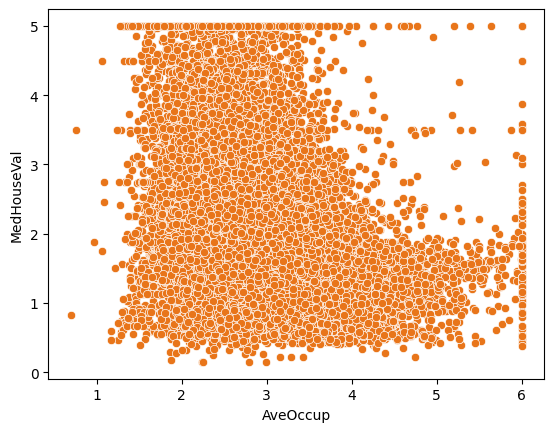

In [268]:
sns.scatterplot(y='MedHouseVal',x="AveOccup",data=data_copy,color='#E8751A')

In [269]:
X = data_copy.iloc[:, 0:8]
y = data_copy.iloc[:, -1]
X_train_o, X_test_o, y_train_o, y_test_o = train_test_split(X, y, test_size=0.20,
                                                    random_state=42)

In [270]:
scaler = StandardScaler()
scaled_X_train_o = scaler.fit_transform(X_train_o)
scaled_X_test_o = scaler.fit_transform(X_test_o)

In [271]:
reg = LinearRegression().fit(scaled_X_train_o, y_train_o)
pred = reg.predict(scaled_X_test_o)
r2_score(y_test_o, pred)

0.6423768969464876

In [272]:
lg=LinearRegression()
poly=PolynomialFeatures(degree=3)

x_train_fit = poly.fit_transform(scaled_X_train_o)
lg.fit(x_train_fit, y_train_o)
x_test_ = poly.fit_transform(scaled_X_test_o)
y_predicted = lg.predict(x_test_)

mae = mean_absolute_error(y_test_o , y_predicted)
print('MAE: ',mae)
print("MSE: ", metrics.mean_squared_error(y_test_o, y_predicted))
print("R squared: ", metrics.r2_score(y_test_o,y_predicted))

MAE:  0.4205198759849219
MSE:  0.3495922837295895
R squared:  0.7332189495535324


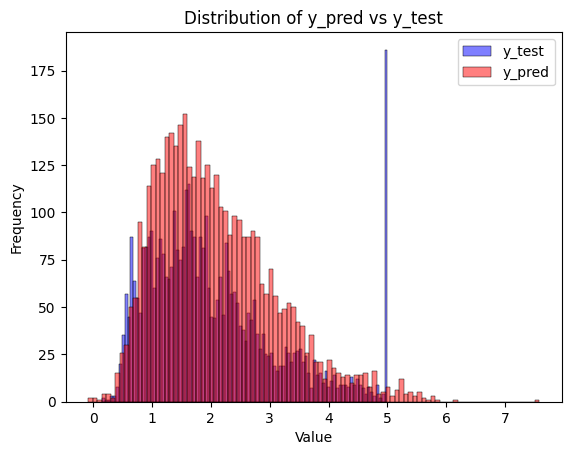

In [273]:
import matplotlib.pyplot as plt
sns.histplot(data=test_pred, x='y_test', bins=100, color='blue', alpha=0.5, label='y_test')
sns.histplot(data=test_pred, x='y_pred', bins=100, color='red', alpha=0.5, label='y_pred')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of y_pred vs y_test')
_ = plt.legend()

In [274]:
test_pred = pd.DataFrame({"y_test":y_test_o, "y_pred": y_predicted})
test_pred

,y_test,y_pred
20046,0.47700,0.770206
3024,0.45800,1.799370
15663,5.00001,4.640372
20484,2.18600,2.598848
9814,2.78000,2.796891
...,...,...
15362,2.63300,2.079737
16623,2.66800,2.269171
18086,5.00001,4.817099
2144,0.72300,1.017444
